Digite a quantidade de livros lidos pelo aluno:  2
Digite a frequência nas aulas do aluno:  11


Previsão para K=1: [43.]
Previsão para K=2: [43.5]
Previsão para K=3: [42.66666667]
Previsão para K=5: [47.4]
Previsão para K=10: [50.4]


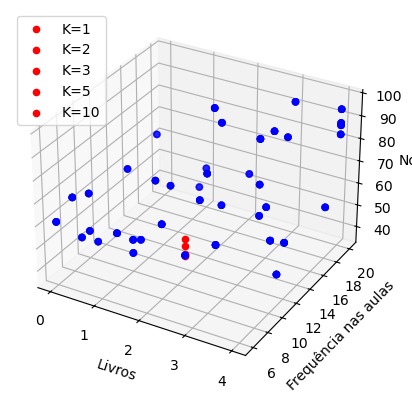

' São configurados os rótulos dos eixos x, y e z com a descrição correspondente às variáveis dos dados\n(Livros, Frequência nas aulas e Nota, respectivamente).\nA chamada ax.legend() habilita a legenda no gráfico, que ajuda a diferenciar entre os dados de treino e os\npontos de previsão para diferentes valores de k.\nplt.show() renderiza e exibe o gráfico. '

In [22]:
import numpy as np             # Inporta a biblioteca numpy
import matplotlib.pyplot as plt # Inporta as bibliotecas para plotar o gráfico 
from mpl_toolkits.mplot3d import Axes3D

class KNNRegressor:            # classe de algoritimo de regreção
    def __init__(self, k=1):   # inicialização do construtor com K recebendo por padrão o valor 1
        self.k = k             # armazena o número de vizinhos mais próximos K o valor padrão é 1
        self.X_treino = None   # recebe None para armazenar os exemplos de treinamento após o método fit ser chamado
        self.y_treino = None   # recebe None para armazenar os rótulos correspondentes aos exemplos de treinamento

    def fit(self, X, y):       # é utilizado para receber os dados de treinamento para então utilizar para fazer previsões com o modelo
        self.X_treino = X      # recebe e armazena a variável de instância X_treino 
        self.y_treino = y      # recebe e armazena a variável de instância y_treino

    def predict(self, X):      # Este método recebe um conjunto de dados X para as previsões que devem ser feitas
        previsao = []          # inicializa uma lista vazia onde serão armazenadas as previsões para cada exemplo no conjunto X.
        for x in X:            # inicializa o lop com que Para cada X para o qual queremos fazer uma previsão:
            distancia = np.sqrt(np.sum(np.square(self.X_treino - x), axis=1)) # calcula a distância euclidiana entre o ponto x e todos os pontos em X_treino. Isso é feito subtraindo x de cada ponto em x_treino, elevando ao quadrado, somando os quadrados (para obter o quadrado da distância euclidiana) e finalmente tirando a raiz quadrada.
            k_indice = np.argsort(distancia)[:self.k] # é Utilizado np.argsort(distancia) para obter os índices dos pontos em X_treino que estão mais próximos de x, classificando do mais próximo para o mais distante, e seleciona os primeiros k desses índices.
            k_prox = self.y_treino[k_indice] # Calcular a média das etiquetas dos k vizinhos mais próximos: Acessando os rótulos y_treino desses k vizinhos mais próximos e calcula-se a média aritmética. Esta média é usada como a previsão do valor de x
            pPrevisao = np.mean(k_prox) # calcula a média aritimética recebendo como parametro k_prox
            previsao.append(pPrevisao) # adiciona na lista previsão, passando como parametro pPrevisão
        return np.array(previsao) # Retornar previsao convertida para um array NumPy

dado = np.loadtxt('C:\\Users\\welli\\Downloads\\Books_attend_grade.txt')  # Carregar os dados do arquivo texto e armazena na variavel dado
# a baixo dividimos a importação do arquivo para preparar os dados, onde X é usado para fazer previsões sobre y.
X = dado[:, :2]  # armazena tudo da primeira ate a segunda coluna sendo livros e frequência
y = dado[:, 2]   # armazena tudo da terceira coluna sendo nota

k_valor = [1, 2, 3, 5, 10] # define valores para k, representado pelo número de vizinhos para quem o KNN deve olhar

livros = int(input("Digite a quantidade de livros lidos pelo aluno: ")) # recebe o dado fornecidos pelo usuario convertendo para inteiro
frequencia = int(input("Digite a frequência nas aulas do aluno: "))     # recebe o dado fornecidos pelo usuario convertendo para inteiro
X_new = np.array([[livros, frequencia]]) # cria um array Numpy com as informações fornecidas

fig = plt.figure() # cria uma nova figura para os gráficos
ax = fig.add_subplot(111, projection='3d') # adiciona um subplot 3D à figura indicando que a grade é 1x1

for k in k_valor:
    knn = KNNRegressor(k=k) # Para cada valor em k_valor, um novo modelo KNNRegressor é instanciado com aquele valor de k
    knn.fit(X, y) # chama as matrizes de características X (número de livros e frequência nas aulas) e o vetor de rótulos y (nota), treinando o modelo com os dados fornecidos.
    previsao = knn.predict(X_new) # é chamado com o novo exemplo X_new (o que o usuário inseriu), e o modelo faz uma previsão de nota para esse novo exemplo.
    print(f"Previsão para K={k}: {previsao}") # imprime no console para cada valor de k.
    
    ax.scatter(X[:, 0], X[:, 1], y, color='blue') # plota os dados de treinamento em azul
    ax.scatter(X_new[:, 0], X_new[:, 1], previsao, label=f'K={k}', color='red') #  Para k, os dados de entrada fornecidos pelo usuário (X_new) e suas previsões correspondentes são também plotados no gráfico, em vermelho.

ax.set_xlabel('Livros')
ax.set_ylabel('Frequência nas aulas')
ax.set_zlabel('Nota')
ax.legend()
plt.show()
''' São configurados os rótulos dos eixos x, y e z com a descrição correspondente às variáveis dos dados
(Livros, Frequência nas aulas e Nota, respectivamente).
A chamada ax.legend() habilita a legenda no gráfico, que ajuda a diferenciar entre os dados de treino e os
pontos de previsão para diferentes valores de k.
plt.show() renderiza e exibe o gráfico. '''


In [35]:
import numpy as np

class KNNRegressor:
    def __init__(self, k=1):
        self.k = k
        self.x_treino = None
        self.y_treino = None

    def fit(self, X, y):
        self.x_treino = X
        self.y_treino = y

    def predict(self, X):
        previsao = []
        for x in X:
            distancia = np.sqrt(np.sum(np.square(self.x_treino - x), axis=1))
            k_indices = np.argsort(distancia)[:self.k]
            k_prox = self.y_treino[k_indices]
            pPrevisao = np.mean(k_prox)
            previsao.append(pPrevisao)
        return np.array(previsao)

# Carregar os dados do arquivo
dado = np.loadtxt('C:\\Users\\welli\\Downloads\\Books_attend_grade.txt')

X = dado[:, :2]
y = dado[:, 2]

k_valor = [1, 2, 3, 5, 10]

dados = np.array([[2, 11], [0, 5], [4, 20], [2, 10], [4, 15]])

for livros, frequencia in dados:
    print(f"Valor de livros: {livros}, Frequência: {frequencia}")

    X_new = np.array([[livros, frequencia]])

    for k in k_valor:
        knn = KNNRegressor(k=k)
        knn.fit(X, y)
        previsao = knn.predict(X_new)
        print(f"Previsão para K={k}: {previsao}")



Valor de livros: 2, Frequência: 11
Previsão para K=1: [43.]
Previsão para K=2: [43.5]
Previsão para K=3: [42.66666667]
Previsão para K=5: [47.4]
Previsão para K=10: [50.4]
Valor de livros: 0, Frequência: 5
Previsão para K=1: [61.]
Previsão para K=2: [63.5]
Previsão para K=3: [61.]
Previsão para K=5: [58.8]
Previsão para K=10: [54.9]
Valor de livros: 4, Frequência: 20
Previsão para K=1: [94.]
Previsão para K=2: [91.]
Previsão para K=3: [89.66666667]
Previsão para K=5: [88.8]
Previsão para K=10: [72.9]
Valor de livros: 2, Frequência: 10
Previsão para K=1: [43.]
Previsão para K=2: [42.]
Previsão para K=3: [43.66666667]
Previsão para K=5: [47.]
Previsão para K=10: [52.9]
Valor de livros: 4, Frequência: 15
Previsão para K=1: [69.]
Previsão para K=2: [62.]
Previsão para K=3: [71.]
Previsão para K=5: [73.2]
Previsão para K=10: [72.5]


In [5]:
dado.shape
# mostra a quantidade de linhas e colunas mostrando as dimenções

(40, 3)

In [6]:
dado.size
# mostra o numero de elementos

120